In [1]:
import matplotlib.pyplot as plt
import utils

In [2]:
ALL_DATA_SIZES = [2 ** i for i in range(4, 12)]

In [3]:
def measure_costs(intra_region, src_cloud, src_continent, dst_cloud,
                  dst_continent, label):
    costs = []
    for data_size in ALL_DATA_SIZES:
        result = utils.analyze(data_size, intra_region, src_cloud,
                               src_continent, dst_cloud, dst_continent)
        cost = float(result.split(',')[-1])
        assert cost >= 0
        costs.append(cost)
    plt.plot(ALL_DATA_SIZES, costs, marker='o', label=label)

In [4]:
def plot_costs_for_cloud(src_cloud):
    # Intra-region in North America.
    measure_costs(True, src_cloud=src_cloud, src_continent='north_america',
                  dst_cloud=src_cloud, dst_continent='north_america',
                  label='Intra-region in North America')

    # Inter-region from North America.
    measure_costs(False, src_cloud=src_cloud, src_continent='north_america',
                  dst_cloud=src_cloud, dst_continent='europe',
                  label='Inter-region beginning in North America')

    # North America to Internet.
    measure_costs(False, src_cloud=src_cloud, src_continent='north_america',
                  dst_cloud='internet',
                  dst_continent='north_america',
                  label='North America to Internet')

    plt.xlabel('Data Size (GB)')
    plt.ylabel('Cost ($)')
    plt.legend()

    plt.show()

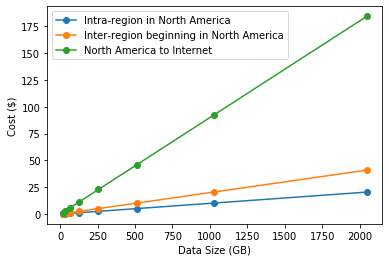

In [5]:
plot_costs_for_cloud('aws')

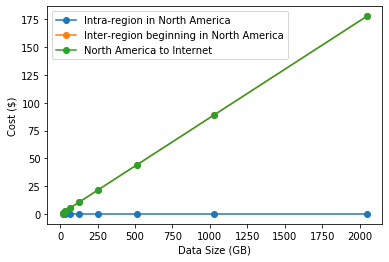

In [6]:
plot_costs_for_cloud('azure')

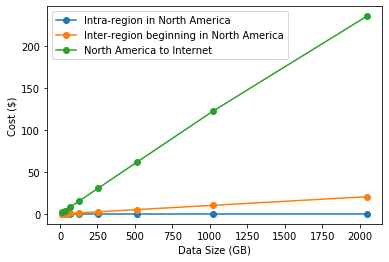

In [7]:
plot_costs_for_cloud('gcp')